In [1]:
import os
import scipy
import numpy as np
import matplotlib.pyplot as plt
import obspy
import pickle
from obspy import UTCDateTime
from obspy.clients.fdsn import Client
import util
import pandas as pd
from obspy import read

from obspy.io.xseed import Parser

from obspy.signal import PPSD

In [2]:
root = '/home/earthquakes1/homes/Rebecca/phd/data/2018_2021_global_m5/'#'/home/earthquakes1/homes/Rebecca/phd/data/2019_global_m5/'
eq_list = os.listdir(root)

In [3]:
cat = obspy.read_events('/home/earthquakes1/homes/Rebecca/phd/data/2018_2021_global_m5_catalog.xml')

In [4]:
eq_with_data = []
cat_with_data = cat.copy()
cat_with_data.clear()
for event in cat:
    eq_name = util.catEventToFileName(event)
    if os.path.isdir(root+eq_name) and os.path.isdir(root+eq_name+'/station_xml_files'):
        eq_with_data.append(eq_name)
        cat_with_data.extend([event])

In [5]:
eq_no = 0
for eq_name in eq_with_data[0:1]:
    print(str(eq_no) + ' out of '+ str(len(eq_with_data)))# find matching cat event:
    eq_no += 1
    for event in cat_with_data:
        if eq_name == util.catEventToFileName(event):
            cat_entry = event
            break
    data = obspy.read(root+eq_name+'/data/*/*')
    data.interpolate(100, 'lanczos', a = 20)
    inv = obspy.read_inventory(root+eq_name+'/station_xml_files/*')
    with open(root+eq_name+'/picks.pkl', 'rb') as f:
        picks = pickle.load(f)
        
    for i in range(0, len(data)):  # iterate through all traces
        tr_name = data[i].stats.network+'.'+data[i].stats.station+'.'+data[i].stats.location
        if data[i].stats.channel[2] == 'Z' and tr_name in picks.keys():  # only use vertical components at stations with a pick
            try:
                tr = data[i].copy()
                tr.remove_response(inv

SyntaxError: unexpected EOF while parsing (449620124.py, line 20)

In [48]:
picks

NameError: name 'picks' is not defined

In [17]:
st[0].stats

         network: BK
         station: JCC
        location: 00
         channel: HHE
       starttime: 2018-01-25T17:19:34.118393Z
         endtime: 2018-01-25T17:29:34.108393Z
   sampling_rate: 100.0
           delta: 0.01
            npts: 60000
           calib: 1.0
         _format: MSEED
           mseed: AttribDict({'dataquality': 'Q', 'number_of_records': 110, 'encoding': 'STEIM2', 'byteorder': '>', 'record_length': 4096, 'filesize': 450560})

In [ ]:
eq_no = 0
for eq_name in eq_with_data[0:100]:
    print(str(eq_no) + ' out of '+ str(len(eq_with_data)))# find matching cat event:
    eq_no += 1
    for event in cat_with_data:
        if eq_name == util.catEventToFileName(event):
            cat_entry = event
            break
    eq_lat= cat_entry.origins[0].latitude
    eq_long = cat_entry.origins[0].longitude
    eq_mag = cat_entry.magnitudes[0].mag
    eq_mag_str = "{:.1f}".format(eq_mag)

    data = obspy.read(root+eq_name+'/data/*/*')
    data.interpolate(100, 'lanczos', a = 20)
    inv = obspy.read_inventory(root+eq_name+'/station_xml_files/*')

    with open(root+eq_name+'/picks.pkl', 'rb') as f:
        picks = pickle.load(f)
    n_records = 0
    sampling_rate = 100 # get this from tr.stats.sampling_rate
    # sensor_types = self.data_stats['sensor_types'] for automated OOP
    
    for i in range(0, len(data)):  # iterate through all traces
        tr_name = data[i].stats.network+'.'+data[i].stats.station+'.'+data[i].stats.location
        if data[i].stats.channel[2] == 'Z' and tr_name in picks.keys():  # only use vertical components at stations with a pick
            try:
                tr = data[i].copy()
                tr.remove_response(inv)
                pick = picks[tr_name]
                pick_samples = int(round((UTCDateTime(pick) - tr.stats.starttime)*tr.stats.sampling_rate, 0))
                print(pick_samples)

                sta_lat = inv.select(network = tr.stats.network, station = tr.stats.station)[0][0].latitude
                sta_long = inv.select(network = tr.stats.network, station = tr.stats.station)[0][0].longitude

                distance = np.sqrt((eq_lat - sta_lat)**2 + (eq_long - sta_long)**2) * 110 # 2D for now...
                if distance < 200: 
                    dists.append(distance)
                    print(distance)
                    tr.filter('bandpass', freqmin=0.1, freqmax = 3) 
                    displ = tr.integrate()
                    abs_displ = abs(displ.data) # find absolute of trace
                    sum_abs_displ = df[eq_mag_str][int(distance//25)]
                    window = int(100 * tr.stats.sampling_rate)
                    sum_abs_displ =  sum_abs_displ + abs_displ[pick_samples:pick_samples+window] # calculate aad for 10000 samples after p wave arrival
                    df[eq_mag_str][int(distance//25)] = sum_abs_displ
                    current = ad[eq_mag_str][int(distance//25)]
                    current.append(abs_displ[pick_samples:pick_samples+window])
                    ad[eq_mag_str][int(distance//25)]= current
                    counts[eq_mag_str][int(distance//25)] = counts[str(np.floor(eq_mag))][int(distance//25)]  + 1
            except:
                continue
            

20180130_192419.a
{}
20180125_172434.a
{}
20180125_163943.a
{}
20180124_074605.a
{'IQ.PICL6.': UTCDateTime(2018, 1, 24, 7, 46, 18, 30000), 'IQ.PICL2.': UTCDateTime(2018, 1, 24, 7, 46, 20, 690000), 'CX.PB08.': UTCDateTime(2018, 1, 24, 7, 46, 20, 878393), 'CX.HMBCX.': UTCDateTime(2018, 1, 24, 7, 46, 23, 680000), 'CX.PB11.': UTCDateTime(2018, 1, 24, 7, 46, 24, 310000), 'CX.PB01.': UTCDateTime(2018, 1, 24, 7, 46, 24, 718393), 'IQ.UNAP.': UTCDateTime(2018, 1, 24, 7, 46, 25, 910000), 'IQ.SALG.': UTCDateTime(2018, 1, 24, 7, 46, 27, 210000), 'CX.PATCX.': UTCDateTime(2018, 1, 24, 7, 46, 27, 429999), 'CX.PSGCX.': UTCDateTime(2018, 1, 24, 7, 46, 28, 739998), 'CX.PB02.': UTCDateTime(2018, 1, 24, 7, 46, 29, 278393)}
failed
failed
failed
success
success
success
failed
failed
failed
failed
failed
failed
success
success
success
success
success
success
success
success
success
failed
failed
failed
success
success
success
failed
failed
failed
success
success
success
success
success
success
success
succes

/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


success
success
success
success
success
success
saved!
20180116_150353.a
{}
20180115_081823.a
{}
20180111_170318.a
{'G.HDC.00': UTCDateTime(2018, 1, 11, 17, 3, 37, 120000), 'NU.BLUN.': UTCDateTime(2018, 1, 11, 17, 3, 40, 870000), 'NU.ACON.': UTCDateTime(2018, 1, 11, 17, 3, 41, 610000)}
success
success
success
success
success
success
failed
failed
failed
success
success
success
failed
failed
failed
saved!
20180110_051211.a
{'ND.MARNC.00': UTCDateTime(2018, 1, 10, 5, 12, 31, 1874)}
success
success
success
failed
failed
failed
saved!
20180110_031644.a
{'CX.PB16.': UTCDateTime(2018, 1, 10, 3, 17, 2, 809998), 'CX.PB18.': UTCDateTime(2018, 1, 10, 3, 17, 5, 290000), 'CX.PB12.': UTCDateTime(2018, 1, 10, 3, 17, 6, 10000), 'CX.MNMCX.': UTCDateTime(2018, 1, 10, 3, 17, 7, 110000), 'CX.PB11.': UTCDateTime(2018, 1, 10, 3, 17, 25, 510000)}
success
success
success
failed
failed
failed
success
success
success
success
success
success
success
success
success
success
success
success
failed
failed
failed
s

/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


success
success
success
success
success
saved!
20180107_085529.a
{'NU.CRIN.': UTCDateTime(2018, 1, 7, 8, 55, 48, 570000), 'NU.CNGN.': UTCDateTime(2018, 1, 7, 8, 55, 52, 660000)}
success
success
success
success
success
success
failed
failed
failed
saved!
20180102_042417.a
{'HT.SOH.': UTCDateTime(2018, 1, 2, 4, 24, 27, 720000), 'HT.THE.': UTCDateTime(2018, 1, 2, 4, 24, 28, 510000), 'HT.HORT.': UTCDateTime(2018, 1, 2, 4, 24, 29, 660000), 'HL.NVR.': UTCDateTime(2018, 1, 2, 4, 24, 32, 870000), 'HT.KOKK.': UTCDateTime(2018, 1, 2, 4, 24, 35, 170000)}
failed
failed
failed
success
success
success
success
success
success
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
failed
success
success
success
failed
failed
failed
success
success
success
failed
failed
failed
success
success
success
failed
failed
failed
saved!
20180221_234456.a
{'CL.MG00.00': UTCDateTime(2018, 2, 21, 23, 43, 38, 190000), 'CL.ROD3.00': UTCDateTime(2018, 2, 21, 23, 43, 38, 755000), 'CL.AGRP.00': UT

/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "
/home/earthquakes1/software/Mageia8/anaconda3/lib/python3.9/site-packages/obspy/io/stationxml/core.py:96: UserWarning: The StationXML file has version 1, ObsPy can read versions (1.0, 1.1). Proceed with caution.
  warnings.warn("The StationXML file has version %s, ObsPy can "


success
success
success
success
success
saved!


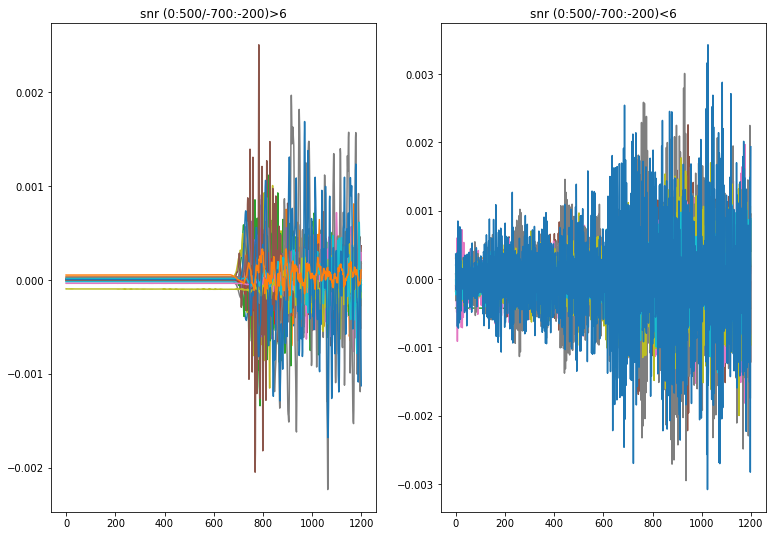

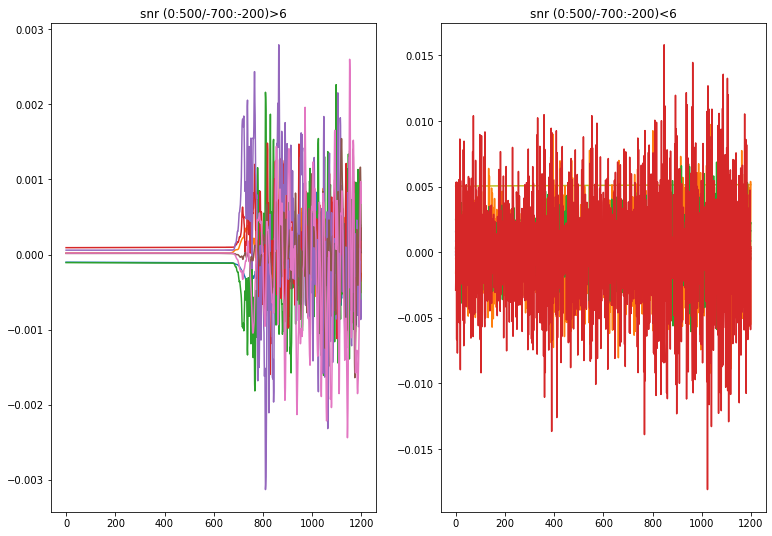

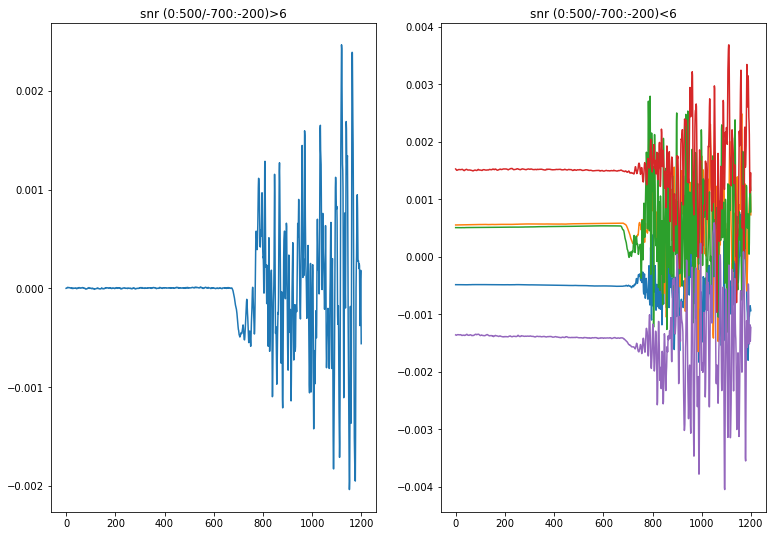

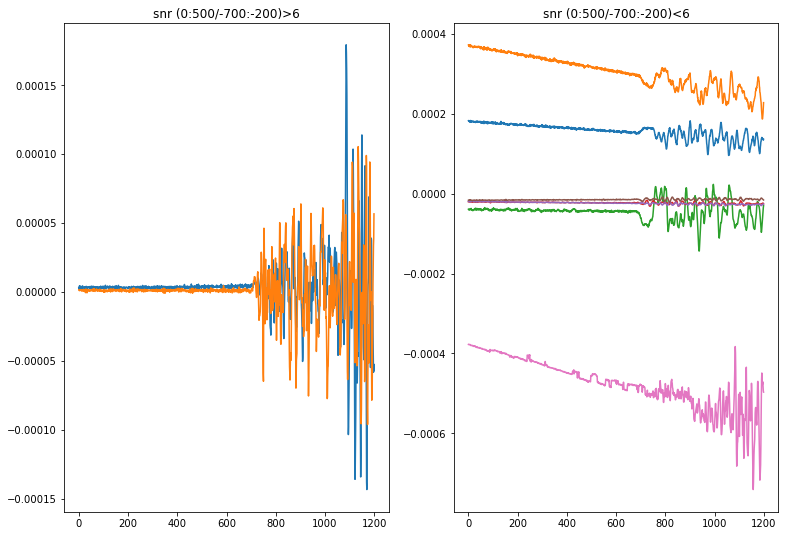

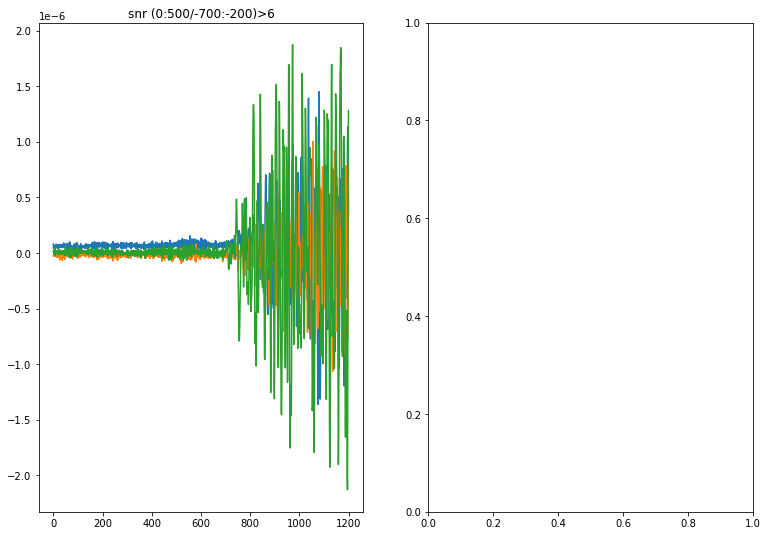

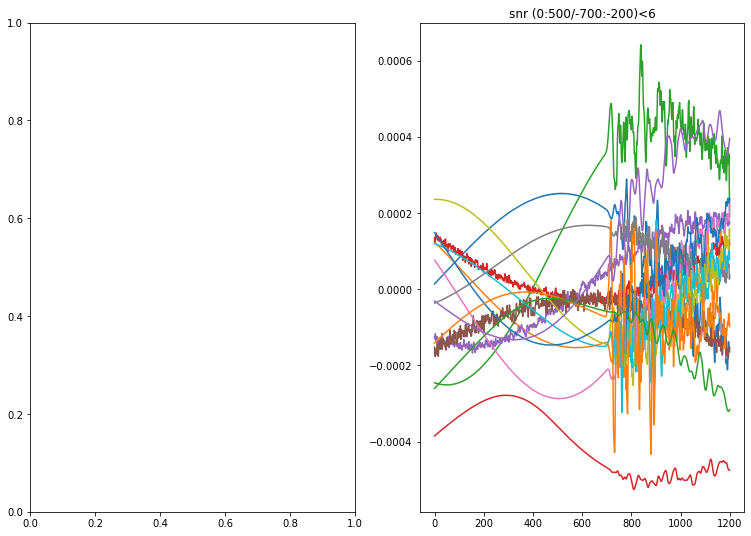

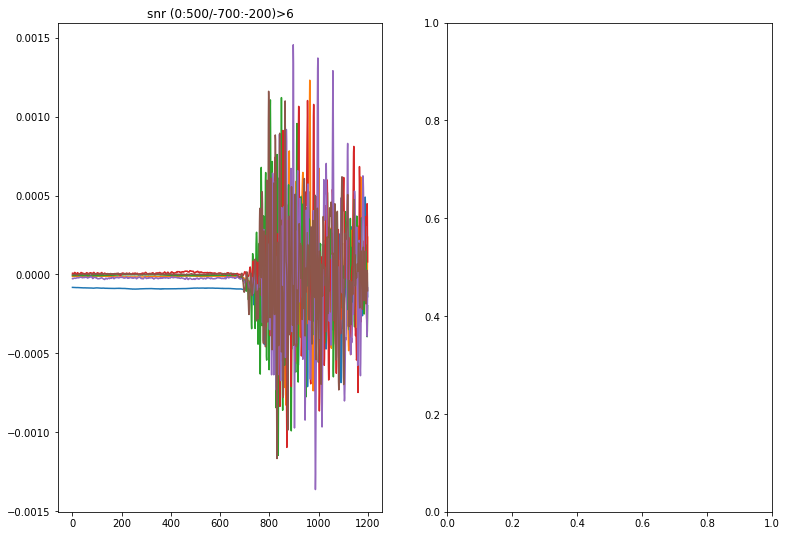

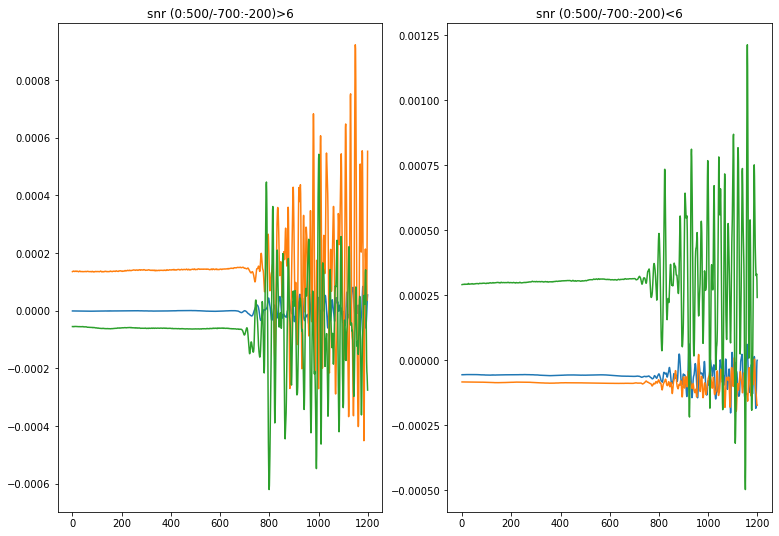

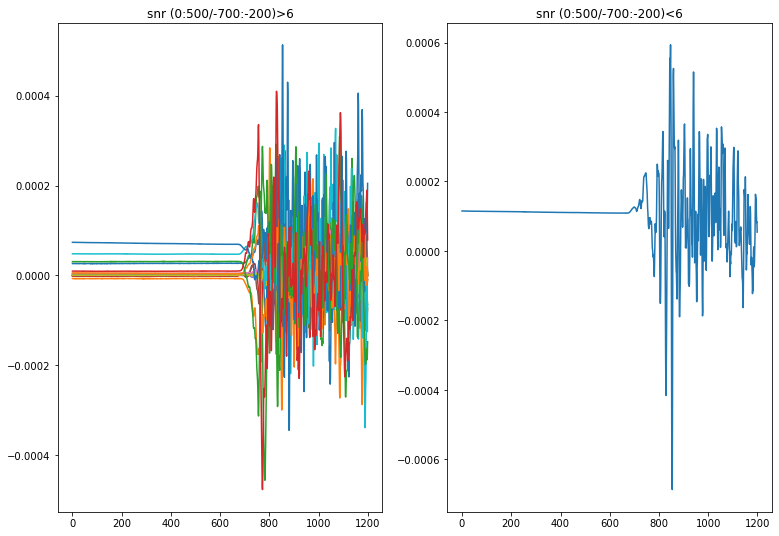

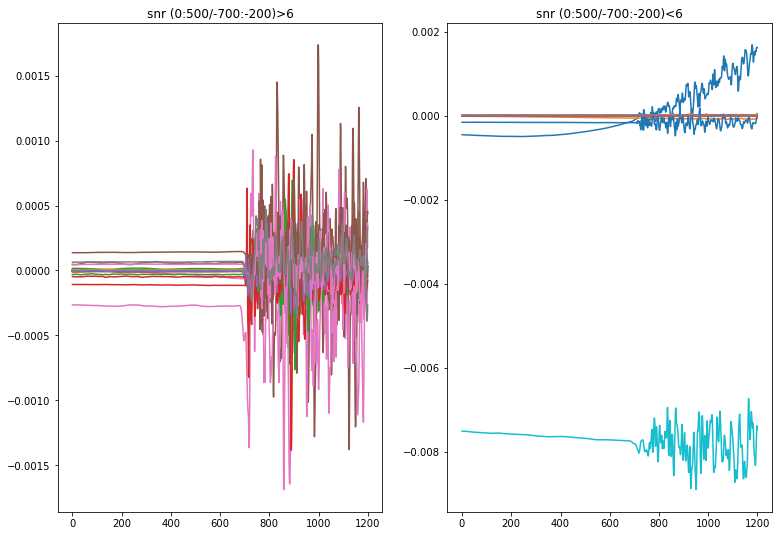

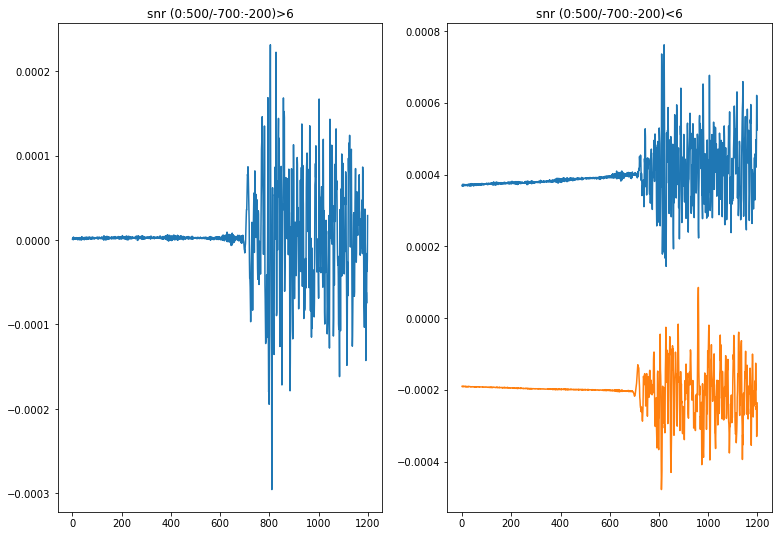

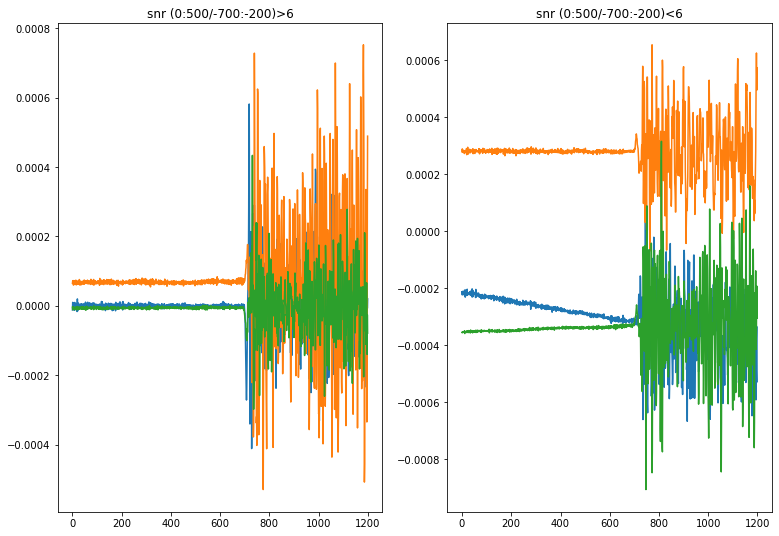

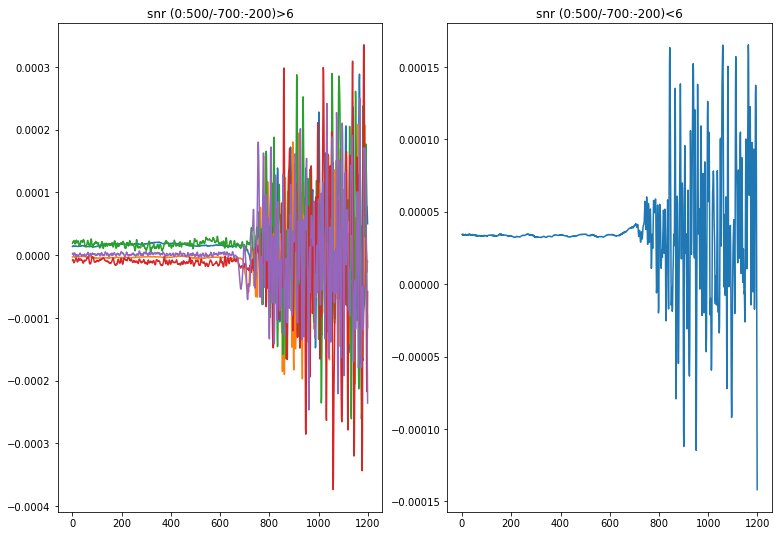

In [48]:
import random 
#fig, axs = plt.subplots(1,2, figsize = (12.9, 9))
snr_list = []
picks_sample = []
mag_list = []
for i in range(0,20):
    eq_no = i#eq_no = random.randint(0, len(eq_with_data))
    snr_list.append([])
    #picks_sample.append([])
    mag_list.append([])
    print(eq_with_data[eq_no])
    st = obspy.read(root+eq_with_data[eq_no]+'/data/*/*')
    #print(print(st.__str__(extended=True)))
    with open(root+eq_with_data[eq_no]+'/picks.pkl', 'rb') as f:
        picks = pickle.load(f)
        print(picks)
    inv = obspy.read_inventory(root+eq_with_data[eq_no]+'/station_xml_files/*')
    #print(inv)
    if len(picks)>0:
        fig, axs = plt.subplots(1,2, figsize = (12.8, 9))
        for tr_no in range(0, len(st)):
            tr = st[tr_no]
            tr_name = st[tr_no].stats.network+'.'+st[tr_no].stats.station+'.'+st[tr_no].stats.location
            #print(tr_name, st[tr_no].stats.channel)
            try:
                pick = picks[tr_name]
                pick_samples = int(round((UTCDateTime(pick) - tr.stats.starttime)*tr.stats.sampling_rate, 0))
                #print(pick_samples)
                #picks_sample[eq_no].append(pick_samples)
                tr.remove_response(inv)
                snr = max(abs(tr.data[pick_samples:500+pick_samples]))/max(abs(tr.data[pick_samples-700:pick_samples-200]))
                snr_list[eq_no].append(snr)
                sr = tr.stats.sampling_rate
                mag_list[eq_no].append(cat_with_data[eq_no].magnitudes[0].mag)
                #print(sr)
                if snr>6:
                    axs[0].plot(tr.data[pick_samples-700:pick_samples+500])
                    axs[0].set_title('snr (0:500/-700:-200)>6')
                else:
                    axs[1].plot(tr.data[pick_samples-700:pick_samples+500])
                    axs[1].set_title('snr (0:500/-700:-200)<6')
                print('success')
            except:
                print('failed')
                continue #print('no pick')
            '''tr = st[0]
            print(tr)
            a = os.listdir(root+eq_with_data[eq_no]+'/station_xml_files/')
            #inv2 = inv.select(network = tr.stats.network, station = tr.stats.station)
            inv = obspy.read_inventory(root+eq_with_data[1]+'/station_xml_files/'+tr.stats.network+'.'+tr.stats.station+'.xml')
            #print(inv)
            ppsd = PPSD(tr.stats, metadata=inv, ppsd_length=1800, overlap=0.5,
                    period_smoothing_width_octaves=0.025,
                    period_step_octaves=0.0125,
                    period_limits=(0.008, 50),
                    db_bins=(-200, 20, 0.25))
            print(ppsd.add(tr))
            eq_name = eq_with_data[eq_no]'''
        plt.savefig('/home/earthquakes1/homes/Rebecca/phd/seismo_det/figures/snr/'+eq_with_data[eq_no]+'.png')
        print('saved!')

In [42]:
axs[0].set_title('test')

Text(0.5, 1.0, 'test')

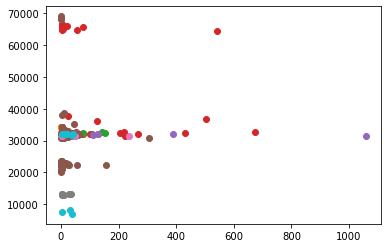

In [17]:
for i in range(0, len(snr_list)):
    plt.scatter(snr_list[i], picks_sample[i])
#plt.xlim([0, 100])

(0.0, 100.0)

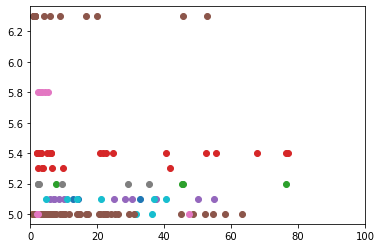

In [50]:
for i in range(0, len(snr_list)):
    plt.scatter(snr_list[i], mag_list[i])
plt.xlim([0,100])

In [18]:
with open('//home/earthquakes1/homes/Rebecca/phd/data/2018_2021_global_m5/20180125_172434.a/picks.pkl', 'rb') as f:
    p = pickle.load(f)

In [19]:
p

{}

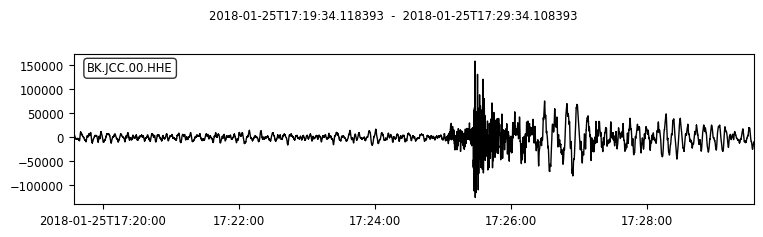

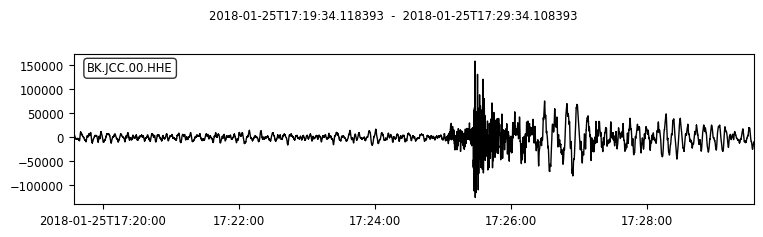

In [16]:
st[0].plot()

In [23]:
for eq_no in range(0, 10):
    eq_name = eq_with_data[eq_no]
    with open(root+eq_name+'/picks.pkl', 'rb') as f:
        picks = pickle.load(f)
    print(eq_no, len(picks))

0 0
1 0
2 0
3 11
4 0
5 7
6 2
7 0
8 0
9 3


/tmp/ipykernel_154708/312221159.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  snr_list_all = np.concatenate(np.array(snr_list))


(array([ 61.,  30.,  19.,  10.,  10.,   7.,   4.,   3.,   5.,   0.,   3.,
          2.,   3.,   3.,   1.,   3.,   1.,   1.,   0.,   2.,   1.,   0.,
          1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,
          0.,   0.,   0.,   2.,   0.,   0.,   1.,   1.,   0.,   0.,   1.,
          0.,   1.,   1.,   0.,   1.,   0.,   0.,   0.,   0.,   1.,   1.,
          0.,   0.,   0.,   1.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   1.,   0.,   1.,   0.,   0.,   2.,   0.,   0.,   1.,   1.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,
          0.,   0.,   0.,   0.,   0., 

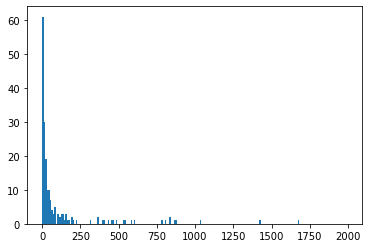

In [92]:
snr_list_all = np.concatenate(np.array(snr_list))
plt.hist(snr_list_all, np.arange(0, 2000, 10))

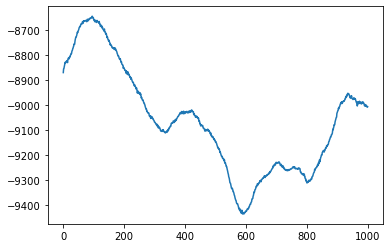

In [76]:
plt.plot(st[0].data[0:1000])


In [29]:
inv.select(network = tr.stats.network, station = tr.stats.station)

Inventory created at 2022-02-08T04:12:47.000000Z
	Created by: NCEDC WEB SERVICE: fdsnws-station | version: 1.1
		    http://service.ncedc.org/fdsnws/station/1/query?net=BK&sta=JCC&cha=...
	Sending institution: NCEDC (NCEDC)
	Contains:
		Networks (1):
			BK
		Stations (1):
			BK.JCC (Jacoby Creek, Bayside, CA, USA)
		Channels (3):
			BK.JCC.00.HHZ, BK.JCC.00.HHN, BK.JCC.00.HHE

In [13]:
ppsd = PPSD(tr.stats, metadata=inv)

In [31]:
ppsd.add(st)

False

In [15]:
ppsd